<a href="https://colab.research.google.com/github/raphaelfontenelle/MXNet-Gluon/blob/main/Detection_Pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict with pre-trained AlphaPose Estimation models

In [4]:
!pip install gluoncv
!pip install mxnet

     |████████████████████████████████| 46.9 MB 1.3 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [42]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_simple_pose, heatmap_to_coord
from mxnet.gluon.data.vision import transforms
import mxnet as mx
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose

## Load a pretrained model

In [16]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('simple_pose_resnet18_v1b', pretrained=True)

In [17]:
detector.reset_class(["person"], reuse_weights=['person'])

# Pre-process an image for detector, and make inference

In [40]:
im_fname = utils.download('https://github.com/raphaelfontenelle/MXNet-Gluon/blob/' +
                          'main/soccer.png?raw=true',)
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

class_IDs, scores, bounding_boxs = detector(x)

1562KB [00:00, 46129.55KB/s]            

Shape of pre-processed image: (1, 3, 512, 605)


## Process tensor from detector to keypoint network

In [43]:
pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)

# Predict with a Alpha Pose network

In [44]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)

## Display the pose estimation results

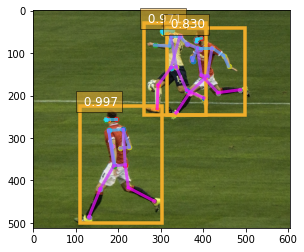

In [45]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
plt.show()